# Preprocessing

In [17]:
import pandas as pd
import numpy as np
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor as rfr,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [171]:
from ggplot import *

/anaconda2/lib/python2.7/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/anaconda2/lib/python2.7/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
#pipeline maker
from sklearn.pipeline import make_pipeline

#scaler
from sklearn.preprocessing import RobustScaler

#model selection
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split

#MSE
from sklearn.metrics import mean_squared_error

In [81]:
# #define a dropin function to evaluate prediction
# n_folds = 10

# #use root mean squre error as the metric
# def rmsle_cv(model):
#     kf = KFold(n_folds, shuffle=True, random_state=1).get_n_splits(train.values)
#     #doesn't really need to define KFolds actually
#     rmse = np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
#     return(rmse)

n_folds = 10
#this looks better, lets me use kfolds
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=1).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

# Modeling

In [119]:
train = pd.read_csv("./train_transformed.csv")
test = pd.read_csv("./test_transformed.csv")
y_train = pd.read_csv("./y_train.csv")
#train_original = pd.read_csv("./train.csv")

In [120]:
y_train = y_train['y_train'].values 
#train_original['SalePrice']

In [121]:
y_train

array([ 12.24769912,  12.10901644,  12.31717117, ...,  12.49313327,
        11.86446927,  11.90159023])

In [60]:
#use .values from pd to extract the array typed data
#note that call values will turn this into row by col

In [14]:
#note that the prediction here is based on logp1

## LASSO

In [122]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha = 0.00099, random_state=1))

In [123]:
score = rmsle_cv(lasso) #hmm is this correct?

In [124]:
score #why the value is so low? #this value looks very strange
#This is incorrect. Why?

array([ 0.11712536,  0.09778992,  0.11367706,  0.1289121 ,  0.13796741,
        0.10586948,  0.11497737,  0.09619981,  0.09314807,  0.12175056])

In [36]:
#np.sqrt(score.mean())
#len(y_train)

In [125]:
lasso.fit(train.values, y_train)

Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('lasso', Lasso(alpha=0.00099, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=1,
   selection='cyclic', tol=0.0001, warm_start=False))])

In [126]:
lasso.predict(train.values)

array([ 12.23609746,  12.11723304,  12.27213873, ...,  12.43236302,
        11.83154009,  11.95434882])

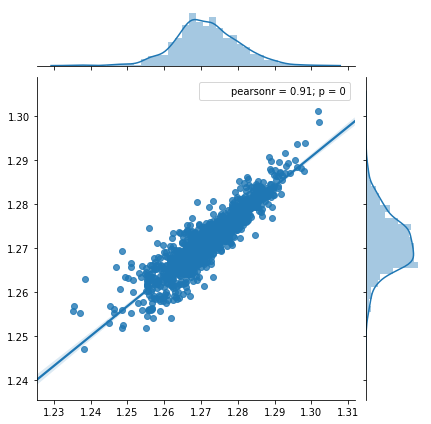

In [75]:
sns.jointplot(y_train, lasso.predict(train.values), kind="reg") 

In [128]:
#same correlation due to repeated exp
np.sqrt(((y_train - lasso.predict(train.values))**2).mean()) #this looks correct

0.10487353198852509

In [130]:
np.sqrt(-cross_val_score(lasso, X=train.values, y=y_train, cv=10, scoring="neg_mean_squared_error")) #R sqared 

array([ 0.11712536,  0.09778992,  0.11367706,  0.1289121 ,  0.13796741,
        0.10586948,  0.11497737,  0.09619981,  0.09314807,  0.12175056])

In [141]:
#looks like it's overfitting / nope
lasso_predictor = lasso.steps[1][1]
lasso_predictor.coef_ #coefficients 
list(train.columns) # column names

['1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'Alley',
 'BedroomAbvGr',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtQual',
 'BsmtUnfSF',
 'CentralAir',
 'EnclosedPorch',
 'ExterCond',
 'ExterQual',
 'Fence',
 'FireplaceQu',
 'Fireplaces',
 'FullBath',
 'Functional',
 'GarageArea',
 'GarageCars',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'HeatingQC',
 'KitchenAbvGr',
 'KitchenQual',
 'LandSlope',
 'LotArea',
 'LotFrontage',
 'LotShape',
 'LowQualFinSF',
 'MSSubClass',
 'MasVnrArea',
 'MiscVal',
 'MoSold',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual',
 'PavedDrive',
 'PoolArea',
 'PoolQC',
 'ScreenPorch',
 'Street',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'WoodDeckSF',
 'YearBuilt',
 'YearRemodAdd',
 'YrSold',
 'OverallSF',
 'BldgType_1Fam',
 'BldgType_2fmCon',
 'BldgType_Duplex',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'Condition1_Artery',
 'Condition1_Feedr'

In [144]:
list(zip(train.columns, lasso_predictor.coef_)) #zip already returns a list

[('1stFlrSF', 0.0050283351381978812),
 ('2ndFlrSF', 0.0),
 ('3SsnPorch', 0.00013463022309330192),
 ('Alley', 0.0),
 ('BedroomAbvGr', -0.00018325732812321204),
 ('BsmtCond', 0.0022549650425837419),
 ('BsmtExposure', -0.0049019544841306332),
 ('BsmtFinSF1', 0.053245977502409794),
 ('BsmtFinSF2', 3.836293158973005e-05),
 ('BsmtFinType1', -0.0045970964904422955),
 ('BsmtFinType2', 0.00035188947569999798),
 ('BsmtFullBath', 0.020817760366697684),
 ('BsmtHalfBath', -0.0),
 ('BsmtQual', -0.015473072611595117),
 ('BsmtUnfSF', -0.0),
 ('CentralAir', 0.046814572246245661),
 ('EnclosedPorch', 0.00011674396489884274),
 ('ExterCond', 0.008679280388754906),
 ('ExterQual', -0.0088244977044356649),
 ('Fence', 0.0029416334150022864),
 ('FireplaceQu', -0.0025118639328180967),
 ('Fireplaces', 0.024849669792898411),
 ('FullBath', 0.004870628188945892),
 ('Functional', 0.016890398536536441),
 ('GarageArea', 0.015663568889703126),
 ('GarageCars', 0.026434460842786903),
 ('GarageCond', 0.0052618638795007416)

In [151]:
x = pd.DataFrame(list(zip(train.columns, lasso_predictor.coef_)))
x.columns = ['Var', 'Coeff']
x.sort_values(by='Coeff', ascending=False)['Coeff'][20:]

23     0.016890
188    0.015850
24     0.015664
54     0.015255
161    0.013737
183    0.012994
94     0.010741
37     0.009366
17     0.008679
36     0.008326
47     0.007673
44     0.007315
31     0.007290
312    0.006890
222    0.005855
26     0.005262
0      0.005028
22     0.004871
209    0.004271
52     0.003035
19     0.002942
156    0.002537
41     0.002506
5      0.002255
29     0.000996
124    0.000976
98     0.000929
10     0.000352
50     0.000257
2      0.000135
         ...   
139   -0.000000
134   -0.000000
138   -0.000000
137    0.000000
132    0.000000
42    -0.000004
181   -0.000092
4     -0.000183
38    -0.000502
20    -0.002512
236   -0.002937
92    -0.003562
27    -0.003944
9     -0.004597
6     -0.004902
174   -0.005031
229   -0.006063
57    -0.006138
99    -0.006941
18    -0.008824
33    -0.011683
34    -0.013906
62    -0.014156
13    -0.015473
219   -0.018458
32    -0.022078
308   -0.044201
157   -0.058772
205   -0.068956
153   -0.202825
Name: Coeff, Length: 295

In [133]:
x = list(zip(train.columns, lasso.steps[1][1].coef_))
x.sort(key = lambda x: x[1])
df = pd.DataFrame(x, columns=['Var', 'Coeff'])

top_pos = df["Coeff"][-20:]
top_neg = df["Coeff"][:20]
top_pos_names = df["Var"][-20:]
top_neg_names = df["Var"][:20]

#stacks arrays horizontally
top_coefs = np.hstack([top_neg, top_pos])
top_names = np.hstack([top_neg_names, top_pos_names])

In [160]:
np.concatenate([top_neg, top_pos])
np.concatenate([top_neg_names, top_pos_names]) #same as hstack; concatenate is good enough

array(['MSZoning_C (all)', 'SaleCondition_Abnorml', 'MSZoning_RM',
       'SaleType_OverallCond_WD3', 'HeatingQC', 'SaleType_WD', 'BsmtQual',
       'BldgType_Twnhs', 'KitchenQual', 'KitchenAbvGr', 'ExterQual',
       'Exterior1st_Wd Sdng', 'YrSold', 'BsmnQual_BsmtCond_GdTA',
       'Neighborhood_Edwards', 'BsmtExposure', 'BsmtFinType1',
       'GarageFinish', 'Exterior1st_HdBoard',
       'Condition1_Condition2_ArteryNorm', 'BsmtFullBath', 'Fireplaces',
       'Neighborhood_BrkSide', 'LotConfig_CulDSac', 'GarageCars',
       'BldgType_1Fam', 'YearRemodAdd', 'Foundation_PConc',
       'Neighborhood_StoneBr', 'SaleType_New', 'Condition1_Norm',
       'OverallCond', 'Exterior1st_BrkFace', 'CentralAir', 'BsmtFinSF1',
       'Neighborhood_Crawfor', 'YearBuilt', 'OverallSF', 'GrLivArea',
       'OverallQual'], dtype=object)

In [159]:
top_names

array(['MSZoning_C (all)', 'SaleCondition_Abnorml', 'MSZoning_RM',
       'SaleType_OverallCond_WD3', 'HeatingQC', 'SaleType_WD', 'BsmtQual',
       'BldgType_Twnhs', 'KitchenQual', 'KitchenAbvGr', 'ExterQual',
       'Exterior1st_Wd Sdng', 'YrSold', 'BsmnQual_BsmtCond_GdTA',
       'Neighborhood_Edwards', 'BsmtExposure', 'BsmtFinType1',
       'GarageFinish', 'Exterior1st_HdBoard',
       'Condition1_Condition2_ArteryNorm', 'BsmtFullBath', 'Fireplaces',
       'Neighborhood_BrkSide', 'LotConfig_CulDSac', 'GarageCars',
       'BldgType_1Fam', 'YearRemodAdd', 'Foundation_PConc',
       'Neighborhood_StoneBr', 'SaleType_New', 'Condition1_Norm',
       'OverallCond', 'Exterior1st_BrkFace', 'CentralAir', 'BsmtFinSF1',
       'Neighborhood_Crawfor', 'YearBuilt', 'OverallSF', 'GrLivArea',
       'OverallQual'], dtype=object)

([<matplotlib.axis.XTick at 0x1a24abb790>,
 <a list of 40 Text xticklabel objects>)

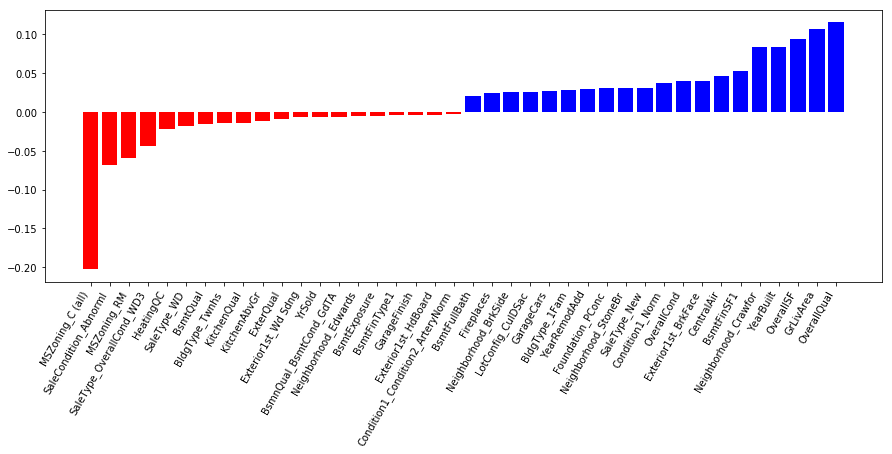

In [134]:
plt.figure(figsize = (15, 5))
colors = ['red' if c < 0 else 'blue' for c in top_coefs]
plt.bar(np.arange(40), top_coefs, color = colors)
feature_names = np.array(train.columns)
plt.xticks(np.arange(40), top_names, rotation = 60, ha = 'right')

In [106]:
#probably overfitting - HMM, also coefficients looks very small
#data / code has some issues, very strange, something is wrong
#predictions look correct though

## ENET

In [161]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=1))

In [165]:
#error is higher, but correlation is also higher? Strange
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

ElasticNet score: 0.1105 (0.0145)


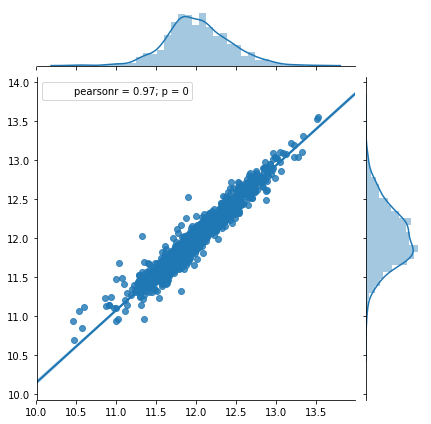

In [163]:
ENet.fit(train.values, y_train)
sns.jointplot(y_train, ENet.predict(train.values), kind="reg")

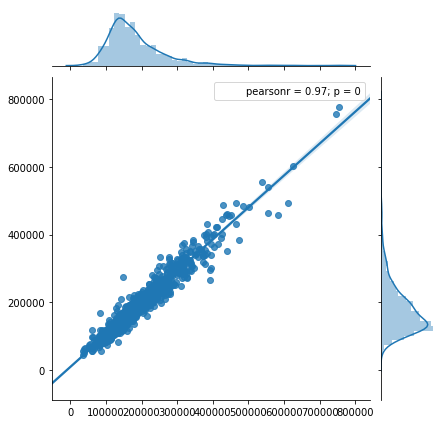

In [166]:
ENet.fit(train.values, y_train)
sns.jointplot(np.expm1(y_train), np.expm1(ENet.predict(train.values)), kind="reg")

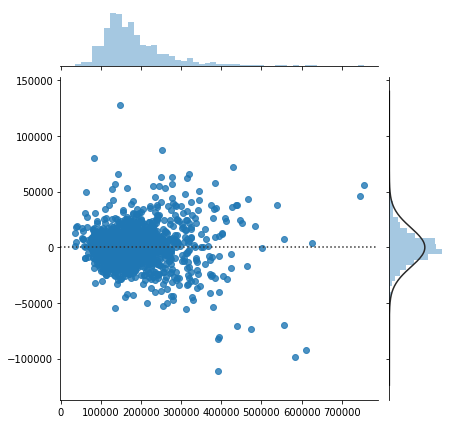

In [180]:
sns.jointplot(np.expm1(y_train), np.expm1(ENet.predict(train.values)), kind="resid")

In [167]:
x = list(zip(train.columns, ENet.steps[1][1].coef_))
x.sort(key = lambda x: x[1])
df = pd.DataFrame(x, columns=['Var', 'Coeff'])

top_pos = df["Coeff"][-20:]
top_neg = df["Coeff"][:20]
top_pos_names = df["Var"][-20:]
top_neg_names = df["Var"][:20]

top_coefs = np.hstack([top_neg, top_pos])
top_names = np.hstack([top_neg_names, top_pos_names])

([<matplotlib.axis.XTick at 0x1a258e89d0>,
 <a list of 40 Text xticklabel objects>)

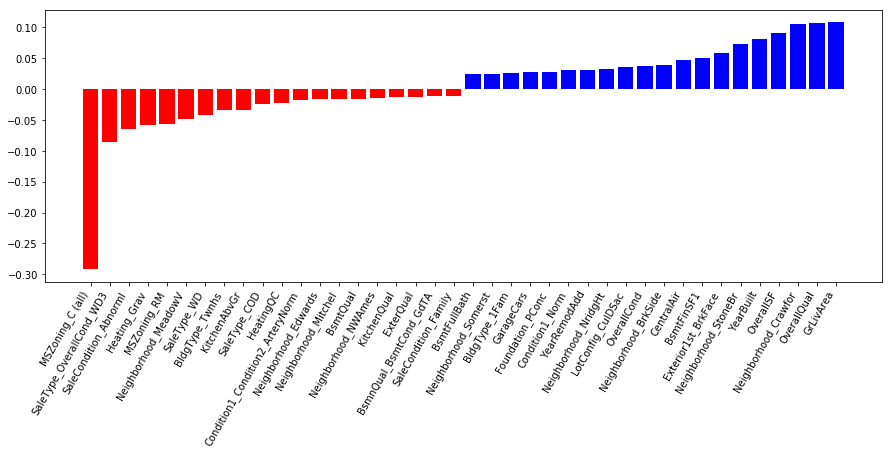

In [168]:
plt.figure(figsize = (15, 5))
colors = ['red' if c < 0 else 'blue' for c in top_coefs]
plt.bar(np.arange(40), top_coefs, color = colors)
feature_names = np.array(train.columns)
plt.xticks(np.arange(40), top_names, rotation = 60, ha = 'right')

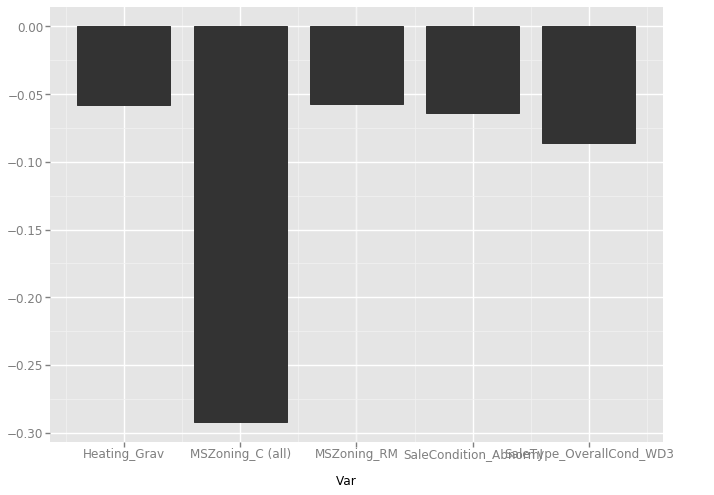

<ggplot: (7557474081)>

In [175]:
ggplot(aes(x="Var", weight="Coeff"),df.sort_values(by="Coeff", ascending=True).head()) + geom_bar()

In [176]:
df.sort_values(by="Coeff", ascending=True).head()

,Var,Coeff
0,MSZoning_C (all),-0.292018
1,SaleType_OverallCond_WD3,-0.085798
2,SaleCondition_Abnorml,-0.064102
3,Heating_Grav,-0.057665
4,MSZoning_RM,-0.056975


In [179]:
#ggplot(aes(x="Var", y="Coeff"),df.sort_values(by="Coeff", ascending=True).head()) +\
#geom_bar(stat='identity') #this doesn't work

## Gradient Boosting

In [181]:
?GradientBoostingRegressor

In [182]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [183]:
score = rmsle_cv(GBoost)

In [184]:
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1135 (0.0156)



In [185]:
GBoost.fit(train.values, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=4,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=15, min_samples_split=10,
             min_weight_fraction_leaf=0.0, n_estimators=3000,
             presort='auto', random_state=5, subsample=1.0, verbose=0,
             warm_start=False)

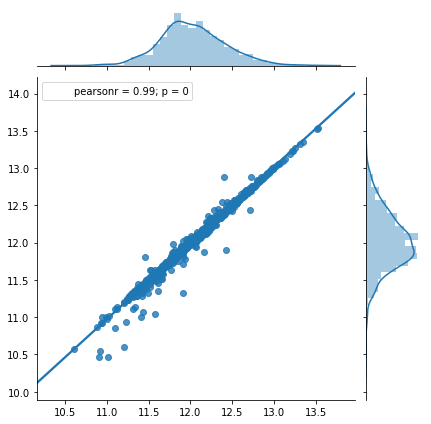

In [187]:
sns.jointplot(GBoost.predict(train.values), y_train, kind="reg")
#fitting of original

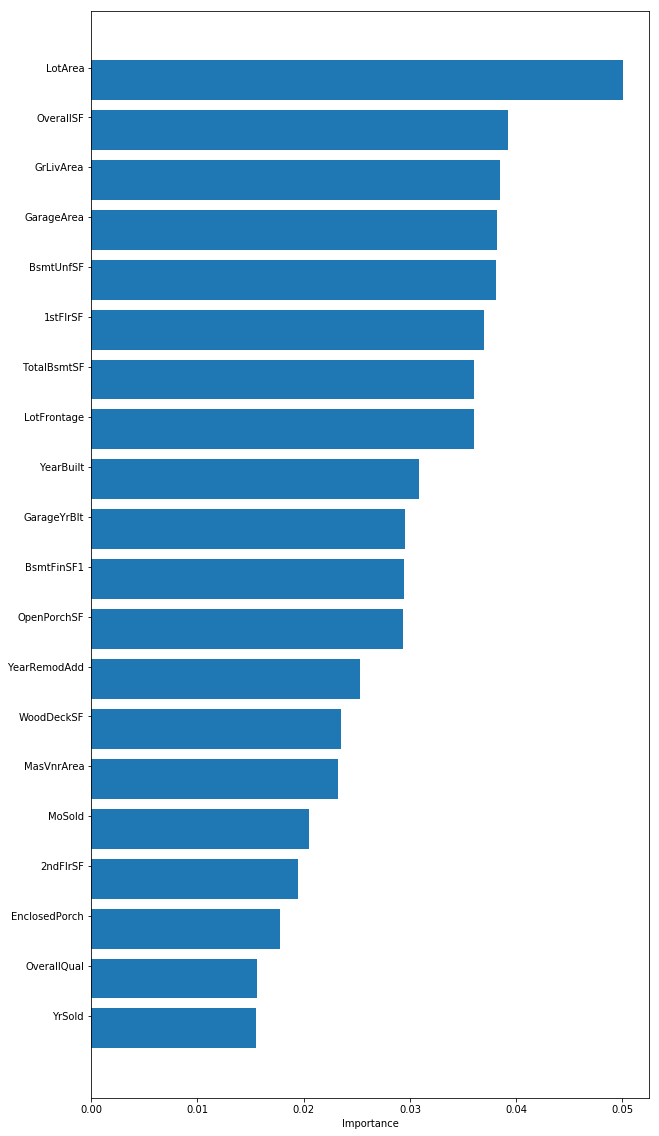

In [192]:
#UNLIKE REGRESSION - this doesn't tell you the sign of importance
x = list(zip(train.columns, GBoost.feature_importances_))
x.sort(key = lambda x: x[1])
df = pd.DataFrame(x, columns = ['Var','Importance'])
top = df["Importance"][-20:]
top_name = df['Var'][-20:]
plt.figure(figsize = (10, 20))
plt.barh(np.arange(len(top_name)), top)
plt.yticks(np.arange(len(top_name))+ 0.25, np.array(top_name))
_ = plt.xlabel('Importance')

In [194]:
score #score looks good!

array([ 0.11919328,  0.09300541,  0.1081214 ,  0.13764448,  0.13376438,
        0.10037948,  0.12149782,  0.10150267,  0.0934729 ,  0.12642061])

In [195]:
LGBoost = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.05,
                                   max_depth=2, max_features='sqrt',
                                    min_samples_leaf=15, min_samples_split=10,
                                    loss='huber', random_state =5)

In [196]:
score = rmsle_cv(LGBoost)
print("LGBoost score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBoost score: 0.1132 (0.0148)



In [197]:
LGBoost.fit(train.values, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=2,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=15, min_samples_split=10,
             min_weight_fraction_leaf=0.0, n_estimators=1000,
             presort='auto', random_state=5, subsample=1.0, verbose=0,
             warm_start=False)

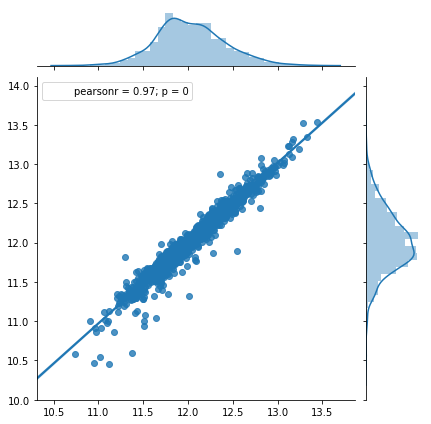

In [199]:
sns.jointplot(LGBoost.predict(train.values),y_train,kind="reg")

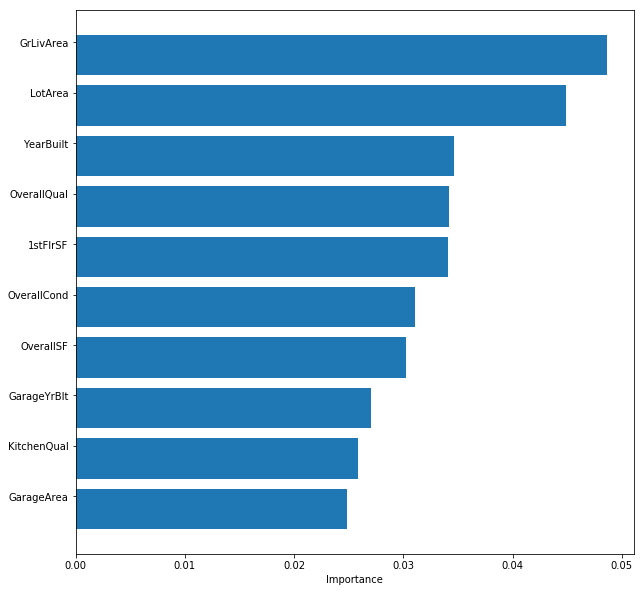

In [198]:
x = list(zip(train.columns, LGBoost.feature_importances_))
x.sort(key = lambda x: x[1])
df = pd.DataFrame(x, columns = ['Var','Importance'])
top = df["Importance"][-10:]
top_name = df['Var'][-10:]
plt.figure(figsize = (10, 10))
plt.barh(np.arange(len(top_name)), top)
plt.yticks(np.arange(len(top_name))+ 0.25, np.array(top_name))
_ = plt.xlabel('Importance')

In [200]:
#LMT XGBOOST!

In [203]:
#Can not install XGBoost on local. XGboost need to be run from Workbench?

In [206]:
import xgboost as xgb

In [205]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Columns: 315 entries, 1stFlrSF to SaleType_OverallCond_WD9
dtypes: float64(12), int64(303)
memory usage: 3.5 MB


In [210]:
xgbRegressor = xgb.XGBRegressor() #minimalistic example

In [208]:
score = rmsle_cv(xgbRegressor)

In [215]:
print score.mean() #actually ... a bit worse

0.122138481944


In [212]:
xgbRegressor.fit(train.values, y_train)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

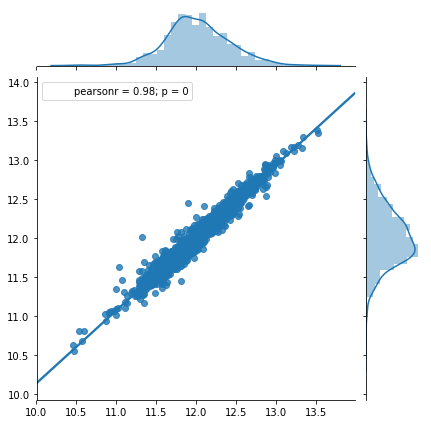

In [213]:
sns.jointplot(y_train, xgbRegressor.predict(train.values), kind="reg") #

# Making Predictions

In [221]:
test_id = pd.read_csv("./test_id.csv", header=None)

In [224]:
test_id[1].values #test ID

array([1461, 1462, 1463, ..., 2917, 2918, 2919])

In [240]:
train_ensemble = np.mean(np.column_stack(
[
    ENet.predict(train.values),
    GBoost.predict(train.values),
    LGBoost.predict(train.values),
    xgbRegressor.predict(train.values)
]
), axis=1)

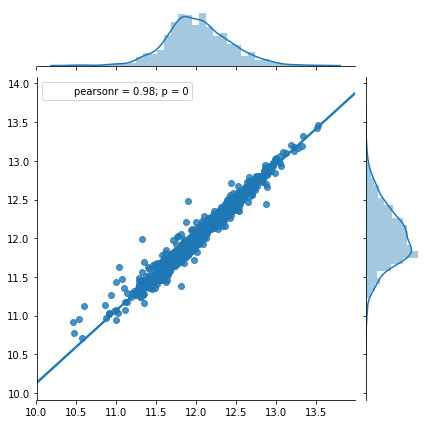

In [242]:
sns.jointplot(y_train, train_ensemble, kind="reg")

In [243]:
test_ensemble = np.mean(np.column_stack(
[
    ENet.predict(test.values),
    GBoost.predict(test.values),
    LGBoost.predict(test.values),
    xgbRegressor.predict(test.values)
]
), axis=1)

In [245]:
np.expm1(test_ensemble) #pricing should be rouneded to nearest hundreds

array([ 121845.95730224,  157289.95264829,  188017.02599289, ...,
        164108.03402295,  118778.17017236,  225058.89358842])

In [250]:
output = pd.DataFrame()

In [253]:
output['Id'] = test_id[1].values
output['SalePrice'] = np.expm1(test_ensemble)

In [254]:
output.head()

,Id,SalePrice
0,1461,121845.957302
1,1462,157289.952648
2,1463,188017.025993
3,1464,196032.331969
4,1465,190549.810391


In [255]:
output.to_csv('submit1.csv', index=False)

# xgboost Grid Search

In [256]:
from sklearn.model_selection import GridSearchCV

In [257]:
?xgbRegressor

In [264]:
params = {'xgbregressor__min_child_weight':[4,5], 
          'xgbregressor__gamma':[0,1.0,5.0],  
          'xgbregressor__subsample':[0.65,0.75,0.85],
          'xgbregressor__max_depth': [2,3,4],
          'xgbregressor__n_estimators': [100,500]}

In [260]:
#?xgbRegressor

In [265]:
pipe = make_pipeline(RobustScaler(), xgbRegressor)

In [ ]:
#Should use MSE neg

In [270]:
grid = GridSearchCV(pipe, param_grid=params, cv=5, verbose=3) #certain verbose level

In [271]:
grid.fit(train.values, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] xgbregressor__gamma=0, xgbregressor__max_depth=2, xgbregressor__n_estimators=100, xgbregressor__subsample=0.65, xgbregressor__min_child_weight=4 
[CV]  xgbregressor__gamma=0, xgbregressor__max_depth=2, xgbregressor__n_estimators=100, xgbregressor__subsample=0.65, xgbregressor__min_child_weight=4, score=0.907624143408, total=   0.4s
[CV] xgbregressor__gamma=0, xgbregressor__max_depth=2, xgbregressor__n_estimators=100, xgbregressor__subsample=0.65, xgbregressor__min_child_weight=4 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  xgbregressor__gamma=0, xgbregressor__max_depth=2, xgbregressor__n_estimators=100, xgbregressor__subsample=0.65, xgbregressor__min_child_weight=4, score=0.907685537614, total=   0.2s
[CV] xgbregressor__gamma=0, xgbregressor__max_depth=2, xgbregressor__n_estimators=100, xgbregressor__subsample=0.65, xgbregressor__min_child_weight=4 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


[CV]  xgbregressor__gamma=0, xgbregressor__max_depth=2, xgbregressor__n_estimators=100, xgbregressor__subsample=0.65, xgbregressor__min_child_weight=4, score=0.893782672788, total=   0.3s
[CV] xgbregressor__gamma=0, xgbregressor__max_depth=2, xgbregressor__n_estimators=100, xgbregressor__subsample=0.65, xgbregressor__min_child_weight=4 
[CV]  xgbregressor__gamma=0, xgbregressor__max_depth=2, xgbregressor__n_estimators=100, xgbregressor__subsample=0.65, xgbregressor__min_child_weight=4, score=0.898099575518, total=   0.2s
[CV] xgbregressor__gamma=0, xgbregressor__max_depth=2, xgbregressor__n_estimators=100, xgbregressor__subsample=0.65, xgbregressor__min_child_weight=4 
[CV]  xgbregressor__gamma=0, xgbregressor__max_depth=2, xgbregressor__n_estimators=100, xgbregressor__subsample=0.65, xgbregressor__min_child_weight=4, score=0.901628034016, total=   0.2s
[CV] xgbregressor__gamma=0, xgbregressor__max_depth=2, xgbregressor__n_estimators=100, xgbregressor__subsample=0.75, xgbregressor__min

[CV]  xgbregressor__gamma=0, xgbregressor__max_depth=2, xgbregressor__n_estimators=500, xgbregressor__subsample=0.85, xgbregressor__min_child_weight=4, score=0.906302321833, total=   1.3s
[CV] xgbregressor__gamma=0, xgbregressor__max_depth=2, xgbregressor__n_estimators=500, xgbregressor__subsample=0.85, xgbregressor__min_child_weight=4 
[CV]  xgbregressor__gamma=0, xgbregressor__max_depth=2, xgbregressor__n_estimators=500, xgbregressor__subsample=0.85, xgbregressor__min_child_weight=4, score=0.917539862406, total=   1.2s
[CV] xgbregressor__gamma=0, xgbregressor__max_depth=2, xgbregressor__n_estimators=500, xgbregressor__subsample=0.85, xgbregressor__min_child_weight=4 
[CV]  xgbregressor__gamma=0, xgbregressor__max_depth=2, xgbregressor__n_estimators=500, xgbregressor__subsample=0.85, xgbregressor__min_child_weight=4, score=0.906042727523, total=   1.3s
[CV] xgbregressor__gamma=0, xgbregressor__max_depth=2, xgbregressor__n_estimators=100, xgbregressor__subsample=0.65, xgbregressor__min

[CV]  xgbregressor__gamma=0, xgbregressor__max_depth=2, xgbregressor__n_estimators=500, xgbregressor__subsample=0.75, xgbregressor__min_child_weight=5, score=0.905012880317, total=   1.4s
[CV] xgbregressor__gamma=0, xgbregressor__max_depth=2, xgbregressor__n_estimators=500, xgbregressor__subsample=0.75, xgbregressor__min_child_weight=5 
[CV]  xgbregressor__gamma=0, xgbregressor__max_depth=2, xgbregressor__n_estimators=500, xgbregressor__subsample=0.75, xgbregressor__min_child_weight=5, score=0.917069188796, total=   1.3s
[CV] xgbregressor__gamma=0, xgbregressor__max_depth=2, xgbregressor__n_estimators=500, xgbregressor__subsample=0.75, xgbregressor__min_child_weight=5 
[CV]  xgbregressor__gamma=0, xgbregressor__max_depth=2, xgbregressor__n_estimators=500, xgbregressor__subsample=0.75, xgbregressor__min_child_weight=5, score=0.908939815023, total=   1.2s
[CV] xgbregressor__gamma=0, xgbregressor__max_depth=2, xgbregressor__n_estimators=500, xgbregressor__subsample=0.85, xgbregressor__min

[CV]  xgbregressor__gamma=0, xgbregressor__max_depth=3, xgbregressor__n_estimators=500, xgbregressor__subsample=0.65, xgbregressor__min_child_weight=4, score=0.903564542831, total=   1.7s
[CV] xgbregressor__gamma=0, xgbregressor__max_depth=3, xgbregressor__n_estimators=500, xgbregressor__subsample=0.65, xgbregressor__min_child_weight=4 
[CV]  xgbregressor__gamma=0, xgbregressor__max_depth=3, xgbregressor__n_estimators=500, xgbregressor__subsample=0.65, xgbregressor__min_child_weight=4, score=0.920830783742, total=   1.8s
[CV] xgbregressor__gamma=0, xgbregressor__max_depth=3, xgbregressor__n_estimators=500, xgbregressor__subsample=0.65, xgbregressor__min_child_weight=4 
[CV]  xgbregressor__gamma=0, xgbregressor__max_depth=3, xgbregressor__n_estimators=500, xgbregressor__subsample=0.65, xgbregressor__min_child_weight=4, score=0.908007020416, total=   1.8s
[CV] xgbregressor__gamma=0, xgbregressor__max_depth=3, xgbregressor__n_estimators=500, xgbregressor__subsample=0.75, xgbregressor__min

[CV]  xgbregressor__gamma=0, xgbregressor__max_depth=3, xgbregressor__n_estimators=100, xgbregressor__subsample=0.85, xgbregressor__min_child_weight=5, score=0.903707404831, total=   0.4s
[CV] xgbregressor__gamma=0, xgbregressor__max_depth=3, xgbregressor__n_estimators=100, xgbregressor__subsample=0.85, xgbregressor__min_child_weight=5 
[CV]  xgbregressor__gamma=0, xgbregressor__max_depth=3, xgbregressor__n_estimators=100, xgbregressor__subsample=0.85, xgbregressor__min_child_weight=5, score=0.902537281066, total=   0.3s
[CV] xgbregressor__gamma=0, xgbregressor__max_depth=3, xgbregressor__n_estimators=100, xgbregressor__subsample=0.85, xgbregressor__min_child_weight=5 
[CV]  xgbregressor__gamma=0, xgbregressor__max_depth=3, xgbregressor__n_estimators=100, xgbregressor__subsample=0.85, xgbregressor__min_child_weight=5, score=0.902040428359, total=   0.3s
[CV] xgbregressor__gamma=0, xgbregressor__max_depth=3, xgbregressor__n_estimators=500, xgbregressor__subsample=0.65, xgbregressor__min

[CV]  xgbregressor__gamma=0, xgbregressor__max_depth=4, xgbregressor__n_estimators=100, xgbregressor__subsample=0.75, xgbregressor__min_child_weight=4, score=0.897645082401, total=   0.4s
[CV] xgbregressor__gamma=0, xgbregressor__max_depth=4, xgbregressor__n_estimators=100, xgbregressor__subsample=0.75, xgbregressor__min_child_weight=4 
[CV]  xgbregressor__gamma=0, xgbregressor__max_depth=4, xgbregressor__n_estimators=100, xgbregressor__subsample=0.75, xgbregressor__min_child_weight=4, score=0.908727259553, total=   0.5s
[CV] xgbregressor__gamma=0, xgbregressor__max_depth=4, xgbregressor__n_estimators=100, xgbregressor__subsample=0.75, xgbregressor__min_child_weight=4 
[CV]  xgbregressor__gamma=0, xgbregressor__max_depth=4, xgbregressor__n_estimators=100, xgbregressor__subsample=0.75, xgbregressor__min_child_weight=4, score=0.910325003881, total=   0.4s
[CV] xgbregressor__gamma=0, xgbregressor__max_depth=4, xgbregressor__n_estimators=100, xgbregressor__subsample=0.85, xgbregressor__min

[CV]  xgbregressor__gamma=0, xgbregressor__max_depth=4, xgbregressor__n_estimators=100, xgbregressor__subsample=0.65, xgbregressor__min_child_weight=5, score=0.900184383638, total=   0.4s
[CV] xgbregressor__gamma=0, xgbregressor__max_depth=4, xgbregressor__n_estimators=100, xgbregressor__subsample=0.65, xgbregressor__min_child_weight=5 
[CV]  xgbregressor__gamma=0, xgbregressor__max_depth=4, xgbregressor__n_estimators=100, xgbregressor__subsample=0.65, xgbregressor__min_child_weight=5, score=0.903880863599, total=   0.4s
[CV] xgbregressor__gamma=0, xgbregressor__max_depth=4, xgbregressor__n_estimators=100, xgbregressor__subsample=0.65, xgbregressor__min_child_weight=5 
[CV]  xgbregressor__gamma=0, xgbregressor__max_depth=4, xgbregressor__n_estimators=100, xgbregressor__subsample=0.65, xgbregressor__min_child_weight=5, score=0.908817174042, total=   0.4s
[CV] xgbregressor__gamma=0, xgbregressor__max_depth=4, xgbregressor__n_estimators=100, xgbregressor__subsample=0.75, xgbregressor__min

[CV]  xgbregressor__gamma=0, xgbregressor__max_depth=4, xgbregressor__n_estimators=500, xgbregressor__subsample=0.85, xgbregressor__min_child_weight=5, score=0.904539939811, total=   2.3s
[CV] xgbregressor__gamma=0, xgbregressor__max_depth=4, xgbregressor__n_estimators=500, xgbregressor__subsample=0.85, xgbregressor__min_child_weight=5 
[CV]  xgbregressor__gamma=0, xgbregressor__max_depth=4, xgbregressor__n_estimators=500, xgbregressor__subsample=0.85, xgbregressor__min_child_weight=5, score=0.914448968362, total=   2.3s
[CV] xgbregressor__gamma=0, xgbregressor__max_depth=4, xgbregressor__n_estimators=500, xgbregressor__subsample=0.85, xgbregressor__min_child_weight=5 
[CV]  xgbregressor__gamma=0, xgbregressor__max_depth=4, xgbregressor__n_estimators=500, xgbregressor__subsample=0.85, xgbregressor__min_child_weight=5, score=0.904413283512, total=   2.3s
[CV] xgbregressor__gamma=1.0, xgbregressor__max_depth=2, xgbregressor__n_estimators=100, xgbregressor__subsample=0.65, xgbregressor__m

[CV]  xgbregressor__gamma=1.0, xgbregressor__max_depth=2, xgbregressor__n_estimators=500, xgbregressor__subsample=0.75, xgbregressor__min_child_weight=4, score=0.874888025123, total=   1.1s
[CV] xgbregressor__gamma=1.0, xgbregressor__max_depth=2, xgbregressor__n_estimators=500, xgbregressor__subsample=0.75, xgbregressor__min_child_weight=4 
[CV]  xgbregressor__gamma=1.0, xgbregressor__max_depth=2, xgbregressor__n_estimators=500, xgbregressor__subsample=0.75, xgbregressor__min_child_weight=4, score=0.853034588045, total=   1.1s
[CV] xgbregressor__gamma=1.0, xgbregressor__max_depth=2, xgbregressor__n_estimators=500, xgbregressor__subsample=0.75, xgbregressor__min_child_weight=4 
[CV]  xgbregressor__gamma=1.0, xgbregressor__max_depth=2, xgbregressor__n_estimators=500, xgbregressor__subsample=0.75, xgbregressor__min_child_weight=4, score=0.860722516137, total=   1.0s
[CV] xgbregressor__gamma=1.0, xgbregressor__max_depth=2, xgbregressor__n_estimators=500, xgbregressor__subsample=0.75, xgbre

[CV]  xgbregressor__gamma=1.0, xgbregressor__max_depth=2, xgbregressor__n_estimators=500, xgbregressor__subsample=0.65, xgbregressor__min_child_weight=5, score=0.874418609797, total=   1.3s
[CV] xgbregressor__gamma=1.0, xgbregressor__max_depth=2, xgbregressor__n_estimators=500, xgbregressor__subsample=0.65, xgbregressor__min_child_weight=5 
[CV]  xgbregressor__gamma=1.0, xgbregressor__max_depth=2, xgbregressor__n_estimators=500, xgbregressor__subsample=0.65, xgbregressor__min_child_weight=5, score=0.872499887773, total=   1.3s
[CV] xgbregressor__gamma=1.0, xgbregressor__max_depth=2, xgbregressor__n_estimators=500, xgbregressor__subsample=0.65, xgbregressor__min_child_weight=5 
[CV]  xgbregressor__gamma=1.0, xgbregressor__max_depth=2, xgbregressor__n_estimators=500, xgbregressor__subsample=0.65, xgbregressor__min_child_weight=5, score=0.856361817292, total=   1.0s
[CV] xgbregressor__gamma=1.0, xgbregressor__max_depth=2, xgbregressor__n_estimators=500, xgbregressor__subsample=0.65, xgbre

[CV]  xgbregressor__gamma=1.0, xgbregressor__max_depth=3, xgbregressor__n_estimators=100, xgbregressor__subsample=0.75, xgbregressor__min_child_weight=4, score=0.846462632158, total=   0.3s
[CV] xgbregressor__gamma=1.0, xgbregressor__max_depth=3, xgbregressor__n_estimators=100, xgbregressor__subsample=0.85, xgbregressor__min_child_weight=4 
[CV]  xgbregressor__gamma=1.0, xgbregressor__max_depth=3, xgbregressor__n_estimators=100, xgbregressor__subsample=0.85, xgbregressor__min_child_weight=4, score=0.868890740818, total=   0.3s
[CV] xgbregressor__gamma=1.0, xgbregressor__max_depth=3, xgbregressor__n_estimators=100, xgbregressor__subsample=0.85, xgbregressor__min_child_weight=4 
[CV]  xgbregressor__gamma=1.0, xgbregressor__max_depth=3, xgbregressor__n_estimators=100, xgbregressor__subsample=0.85, xgbregressor__min_child_weight=4, score=0.872119316018, total=   0.3s
[CV] xgbregressor__gamma=1.0, xgbregressor__max_depth=3, xgbregressor__n_estimators=100, xgbregressor__subsample=0.85, xgbre

[CV]  xgbregressor__gamma=1.0, xgbregressor__max_depth=3, xgbregressor__n_estimators=100, xgbregressor__subsample=0.65, xgbregressor__min_child_weight=5, score=0.849332561901, total=   0.4s
[CV] xgbregressor__gamma=1.0, xgbregressor__max_depth=3, xgbregressor__n_estimators=100, xgbregressor__subsample=0.65, xgbregressor__min_child_weight=5 
[CV]  xgbregressor__gamma=1.0, xgbregressor__max_depth=3, xgbregressor__n_estimators=100, xgbregressor__subsample=0.65, xgbregressor__min_child_weight=5, score=0.848477763414, total=   0.4s
[CV] xgbregressor__gamma=1.0, xgbregressor__max_depth=3, xgbregressor__n_estimators=100, xgbregressor__subsample=0.75, xgbregressor__min_child_weight=5 
[CV]  xgbregressor__gamma=1.0, xgbregressor__max_depth=3, xgbregressor__n_estimators=100, xgbregressor__subsample=0.75, xgbregressor__min_child_weight=5, score=0.869467874496, total=   0.4s
[CV] xgbregressor__gamma=1.0, xgbregressor__max_depth=3, xgbregressor__n_estimators=100, xgbregressor__subsample=0.75, xgbre

[CV]  xgbregressor__gamma=1.0, xgbregressor__max_depth=3, xgbregressor__n_estimators=500, xgbregressor__subsample=0.85, xgbregressor__min_child_weight=5, score=0.853193127719, total=   1.9s
[CV] xgbregressor__gamma=1.0, xgbregressor__max_depth=3, xgbregressor__n_estimators=500, xgbregressor__subsample=0.85, xgbregressor__min_child_weight=5 
[CV]  xgbregressor__gamma=1.0, xgbregressor__max_depth=3, xgbregressor__n_estimators=500, xgbregressor__subsample=0.85, xgbregressor__min_child_weight=5, score=0.855268770777, total=   1.6s
[CV] xgbregressor__gamma=1.0, xgbregressor__max_depth=3, xgbregressor__n_estimators=500, xgbregressor__subsample=0.85, xgbregressor__min_child_weight=5 
[CV]  xgbregressor__gamma=1.0, xgbregressor__max_depth=3, xgbregressor__n_estimators=500, xgbregressor__subsample=0.85, xgbregressor__min_child_weight=5, score=0.849939111495, total=   1.8s
[CV] xgbregressor__gamma=1.0, xgbregressor__max_depth=4, xgbregressor__n_estimators=100, xgbregressor__subsample=0.65, xgbre

[CV]  xgbregressor__gamma=1.0, xgbregressor__max_depth=4, xgbregressor__n_estimators=500, xgbregressor__subsample=0.75, xgbregressor__min_child_weight=4, score=0.874863702243, total=   2.3s
[CV] xgbregressor__gamma=1.0, xgbregressor__max_depth=4, xgbregressor__n_estimators=500, xgbregressor__subsample=0.75, xgbregressor__min_child_weight=4 
[CV]  xgbregressor__gamma=1.0, xgbregressor__max_depth=4, xgbregressor__n_estimators=500, xgbregressor__subsample=0.75, xgbregressor__min_child_weight=4, score=0.853612906577, total=   2.2s
[CV] xgbregressor__gamma=1.0, xgbregressor__max_depth=4, xgbregressor__n_estimators=500, xgbregressor__subsample=0.75, xgbregressor__min_child_weight=4 
[CV]  xgbregressor__gamma=1.0, xgbregressor__max_depth=4, xgbregressor__n_estimators=500, xgbregressor__subsample=0.75, xgbregressor__min_child_weight=4, score=0.858232479319, total=   2.5s
[CV] xgbregressor__gamma=1.0, xgbregressor__max_depth=4, xgbregressor__n_estimators=500, xgbregressor__subsample=0.75, xgbre

[CV]  xgbregressor__gamma=1.0, xgbregressor__max_depth=4, xgbregressor__n_estimators=500, xgbregressor__subsample=0.65, xgbregressor__min_child_weight=5, score=0.874059688815, total=   2.5s
[CV] xgbregressor__gamma=1.0, xgbregressor__max_depth=4, xgbregressor__n_estimators=500, xgbregressor__subsample=0.65, xgbregressor__min_child_weight=5 
[CV]  xgbregressor__gamma=1.0, xgbregressor__max_depth=4, xgbregressor__n_estimators=500, xgbregressor__subsample=0.65, xgbregressor__min_child_weight=5, score=0.873039364757, total=   2.7s
[CV] xgbregressor__gamma=1.0, xgbregressor__max_depth=4, xgbregressor__n_estimators=500, xgbregressor__subsample=0.65, xgbregressor__min_child_weight=5 
[CV]  xgbregressor__gamma=1.0, xgbregressor__max_depth=4, xgbregressor__n_estimators=500, xgbregressor__subsample=0.65, xgbregressor__min_child_weight=5, score=0.855117987593, total=   2.9s
[CV] xgbregressor__gamma=1.0, xgbregressor__max_depth=4, xgbregressor__n_estimators=500, xgbregressor__subsample=0.65, xgbre

[CV]  xgbregressor__gamma=5.0, xgbregressor__max_depth=2, xgbregressor__n_estimators=100, xgbregressor__subsample=0.75, xgbregressor__min_child_weight=4, score=0.746423107437, total=   0.3s
[CV] xgbregressor__gamma=5.0, xgbregressor__max_depth=2, xgbregressor__n_estimators=100, xgbregressor__subsample=0.85, xgbregressor__min_child_weight=4 
[CV]  xgbregressor__gamma=5.0, xgbregressor__max_depth=2, xgbregressor__n_estimators=100, xgbregressor__subsample=0.85, xgbregressor__min_child_weight=4, score=0.786801446881, total=   0.3s
[CV] xgbregressor__gamma=5.0, xgbregressor__max_depth=2, xgbregressor__n_estimators=100, xgbregressor__subsample=0.85, xgbregressor__min_child_weight=4 
[CV]  xgbregressor__gamma=5.0, xgbregressor__max_depth=2, xgbregressor__n_estimators=100, xgbregressor__subsample=0.85, xgbregressor__min_child_weight=4, score=0.771356196076, total=   0.3s
[CV] xgbregressor__gamma=5.0, xgbregressor__max_depth=2, xgbregressor__n_estimators=100, xgbregressor__subsample=0.85, xgbre

[CV]  xgbregressor__gamma=5.0, xgbregressor__max_depth=2, xgbregressor__n_estimators=100, xgbregressor__subsample=0.65, xgbregressor__min_child_weight=5, score=0.745553115414, total=   0.4s
[CV] xgbregressor__gamma=5.0, xgbregressor__max_depth=2, xgbregressor__n_estimators=100, xgbregressor__subsample=0.65, xgbregressor__min_child_weight=5 
[CV]  xgbregressor__gamma=5.0, xgbregressor__max_depth=2, xgbregressor__n_estimators=100, xgbregressor__subsample=0.65, xgbregressor__min_child_weight=5, score=0.750518048821, total=   0.4s
[CV] xgbregressor__gamma=5.0, xgbregressor__max_depth=2, xgbregressor__n_estimators=100, xgbregressor__subsample=0.75, xgbregressor__min_child_weight=5 
[CV]  xgbregressor__gamma=5.0, xgbregressor__max_depth=2, xgbregressor__n_estimators=100, xgbregressor__subsample=0.75, xgbregressor__min_child_weight=5, score=0.775992454893, total=   0.4s
[CV] xgbregressor__gamma=5.0, xgbregressor__max_depth=2, xgbregressor__n_estimators=100, xgbregressor__subsample=0.75, xgbre

[CV]  xgbregressor__gamma=5.0, xgbregressor__max_depth=2, xgbregressor__n_estimators=500, xgbregressor__subsample=0.85, xgbregressor__min_child_weight=5, score=0.761011020173, total=   1.2s
[CV] xgbregressor__gamma=5.0, xgbregressor__max_depth=2, xgbregressor__n_estimators=500, xgbregressor__subsample=0.85, xgbregressor__min_child_weight=5 
[CV]  xgbregressor__gamma=5.0, xgbregressor__max_depth=2, xgbregressor__n_estimators=500, xgbregressor__subsample=0.85, xgbregressor__min_child_weight=5, score=0.760767562059, total=   1.1s
[CV] xgbregressor__gamma=5.0, xgbregressor__max_depth=2, xgbregressor__n_estimators=500, xgbregressor__subsample=0.85, xgbregressor__min_child_weight=5 
[CV]  xgbregressor__gamma=5.0, xgbregressor__max_depth=2, xgbregressor__n_estimators=500, xgbregressor__subsample=0.85, xgbregressor__min_child_weight=5, score=0.756492333099, total=   1.2s
[CV] xgbregressor__gamma=5.0, xgbregressor__max_depth=3, xgbregressor__n_estimators=100, xgbregressor__subsample=0.65, xgbre

[CV]  xgbregressor__gamma=5.0, xgbregressor__max_depth=3, xgbregressor__n_estimators=500, xgbregressor__subsample=0.75, xgbregressor__min_child_weight=4, score=0.777943985128, total=   1.6s
[CV] xgbregressor__gamma=5.0, xgbregressor__max_depth=3, xgbregressor__n_estimators=500, xgbregressor__subsample=0.75, xgbregressor__min_child_weight=4 
[CV]  xgbregressor__gamma=5.0, xgbregressor__max_depth=3, xgbregressor__n_estimators=500, xgbregressor__subsample=0.75, xgbregressor__min_child_weight=4, score=0.753009912401, total=   1.6s
[CV] xgbregressor__gamma=5.0, xgbregressor__max_depth=3, xgbregressor__n_estimators=500, xgbregressor__subsample=0.75, xgbregressor__min_child_weight=4 
[CV]  xgbregressor__gamma=5.0, xgbregressor__max_depth=3, xgbregressor__n_estimators=500, xgbregressor__subsample=0.75, xgbregressor__min_child_weight=4, score=0.75142170889, total=   1.7s
[CV] xgbregressor__gamma=5.0, xgbregressor__max_depth=3, xgbregressor__n_estimators=500, xgbregressor__subsample=0.75, xgbreg

[CV]  xgbregressor__gamma=5.0, xgbregressor__max_depth=3, xgbregressor__n_estimators=500, xgbregressor__subsample=0.65, xgbregressor__min_child_weight=5, score=0.783418969622, total=   1.7s
[CV] xgbregressor__gamma=5.0, xgbregressor__max_depth=3, xgbregressor__n_estimators=500, xgbregressor__subsample=0.65, xgbregressor__min_child_weight=5 
[CV]  xgbregressor__gamma=5.0, xgbregressor__max_depth=3, xgbregressor__n_estimators=500, xgbregressor__subsample=0.65, xgbregressor__min_child_weight=5, score=0.768591673119, total=   1.6s
[CV] xgbregressor__gamma=5.0, xgbregressor__max_depth=3, xgbregressor__n_estimators=500, xgbregressor__subsample=0.65, xgbregressor__min_child_weight=5 
[CV]  xgbregressor__gamma=5.0, xgbregressor__max_depth=3, xgbregressor__n_estimators=500, xgbregressor__subsample=0.65, xgbregressor__min_child_weight=5, score=0.742324106892, total=   1.7s
[CV] xgbregressor__gamma=5.0, xgbregressor__max_depth=3, xgbregressor__n_estimators=500, xgbregressor__subsample=0.65, xgbre

[CV]  xgbregressor__gamma=5.0, xgbregressor__max_depth=4, xgbregressor__n_estimators=100, xgbregressor__subsample=0.75, xgbregressor__min_child_weight=4, score=0.746423107437, total=   0.4s
[CV] xgbregressor__gamma=5.0, xgbregressor__max_depth=4, xgbregressor__n_estimators=100, xgbregressor__subsample=0.85, xgbregressor__min_child_weight=4 
[CV]  xgbregressor__gamma=5.0, xgbregressor__max_depth=4, xgbregressor__n_estimators=100, xgbregressor__subsample=0.85, xgbregressor__min_child_weight=4, score=0.786801446881, total=   0.4s
[CV] xgbregressor__gamma=5.0, xgbregressor__max_depth=4, xgbregressor__n_estimators=100, xgbregressor__subsample=0.85, xgbregressor__min_child_weight=4 
[CV]  xgbregressor__gamma=5.0, xgbregressor__max_depth=4, xgbregressor__n_estimators=100, xgbregressor__subsample=0.85, xgbregressor__min_child_weight=4, score=0.771356196076, total=   0.4s
[CV] xgbregressor__gamma=5.0, xgbregressor__max_depth=4, xgbregressor__n_estimators=100, xgbregressor__subsample=0.85, xgbre

[CV]  xgbregressor__gamma=5.0, xgbregressor__max_depth=4, xgbregressor__n_estimators=100, xgbregressor__subsample=0.65, xgbregressor__min_child_weight=5, score=0.745553115414, total=   0.4s
[CV] xgbregressor__gamma=5.0, xgbregressor__max_depth=4, xgbregressor__n_estimators=100, xgbregressor__subsample=0.65, xgbregressor__min_child_weight=5 
[CV]  xgbregressor__gamma=5.0, xgbregressor__max_depth=4, xgbregressor__n_estimators=100, xgbregressor__subsample=0.65, xgbregressor__min_child_weight=5, score=0.750518048821, total=   0.5s
[CV] xgbregressor__gamma=5.0, xgbregressor__max_depth=4, xgbregressor__n_estimators=100, xgbregressor__subsample=0.75, xgbregressor__min_child_weight=5 
[CV]  xgbregressor__gamma=5.0, xgbregressor__max_depth=4, xgbregressor__n_estimators=100, xgbregressor__subsample=0.75, xgbregressor__min_child_weight=5, score=0.775992454893, total=   0.4s
[CV] xgbregressor__gamma=5.0, xgbregressor__max_depth=4, xgbregressor__n_estimators=100, xgbregressor__subsample=0.75, xgbre

[CV]  xgbregressor__gamma=5.0, xgbregressor__max_depth=4, xgbregressor__n_estimators=500, xgbregressor__subsample=0.85, xgbregressor__min_child_weight=5, score=0.761011020173, total=   2.2s
[CV] xgbregressor__gamma=5.0, xgbregressor__max_depth=4, xgbregressor__n_estimators=500, xgbregressor__subsample=0.85, xgbregressor__min_child_weight=5 
[CV]  xgbregressor__gamma=5.0, xgbregressor__max_depth=4, xgbregressor__n_estimators=500, xgbregressor__subsample=0.85, xgbregressor__min_child_weight=5, score=0.760767562059, total=   2.1s
[CV] xgbregressor__gamma=5.0, xgbregressor__max_depth=4, xgbregressor__n_estimators=500, xgbregressor__subsample=0.85, xgbregressor__min_child_weight=5 
[CV]  xgbregressor__gamma=5.0, xgbregressor__max_depth=4, xgbregressor__n_estimators=500, xgbregressor__subsample=0.85, xgbregressor__min_child_weight=5, score=0.756492333099, total=   2.4s


[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed:  9.7min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('xgbregressor', XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=...:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'xgbregressor__gamma': [0, 1.0, 5.0], 'xgbregressor__max_depth': [2, 3, 4], 'xgbregressor__n_estimators': [100, 500], 'xgbregressor__subsample': [0.65, 0.75, 0.85], 'xgbregressor__min_child_weight': [4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [272]:
grid.best_score_

0.91459107843138099

In [273]:
grid.best_estimator_

Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('xgbregressor', XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=4,
       min_child_weight=5, missing=None, n_estimators=500, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.75))])

In [286]:
np.sqrt(np.mean((grid.predict(train.values) - y_train)**2)) #this is way too small

0.023417301142047556

In [287]:
params = {'xgbregressor__min_child_weight':[4,5], 
          'xgbregressor__gamma':[0,0.1],  
          'xgbregressor__subsample':[0.75,0.85,0.95],
          'xgbregressor__learning_rate':[0.05,0.1],
          'xgbregressor__n_estimators': [500]}

In [288]:
grid = GridSearchCV(pipe, param_grid=params, cv=5, verbose=3, scoring='neg_mean_squared_error') #certain verbose level

In [289]:
grid.fit(train.values, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] xgbregressor__gamma=0, xgbregressor__n_estimators=500, xgbregressor__learning_rate=0.05, xgbregressor__subsample=0.75, xgbregressor__min_child_weight=4 
[CV]  xgbregressor__gamma=0, xgbregressor__n_estimators=500, xgbregressor__learning_rate=0.05, xgbregressor__subsample=0.75, xgbregressor__min_child_weight=4, score=-0.0117663262711, total=   1.5s
[CV] xgbregressor__gamma=0, xgbregressor__n_estimators=500, xgbregressor__learning_rate=0.05, xgbregressor__subsample=0.75, xgbregressor__min_child_weight=4 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV]  xgbregressor__gamma=0, xgbregressor__n_estimators=500, xgbregressor__learning_rate=0.05, xgbregressor__subsample=0.75, xgbregressor__min_child_weight=4, score=-0.014059527788, total=   1.4s
[CV] xgbregressor__gamma=0, xgbregressor__n_estimators=500, xgbregressor__learning_rate=0.05, xgbregressor__subsample=0.75, xgbregressor__min_child_weight=4 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.0s remaining:    0.0s


[CV]  xgbregressor__gamma=0, xgbregressor__n_estimators=500, xgbregressor__learning_rate=0.05, xgbregressor__subsample=0.75, xgbregressor__min_child_weight=4, score=-0.01533726644, total=   1.6s
[CV] xgbregressor__gamma=0, xgbregressor__n_estimators=500, xgbregressor__learning_rate=0.05, xgbregressor__subsample=0.75, xgbregressor__min_child_weight=4 
[CV]  xgbregressor__gamma=0, xgbregressor__n_estimators=500, xgbregressor__learning_rate=0.05, xgbregressor__subsample=0.75, xgbregressor__min_child_weight=4, score=-0.0110413209059, total=   1.6s
[CV] xgbregressor__gamma=0, xgbregressor__n_estimators=500, xgbregressor__learning_rate=0.05, xgbregressor__subsample=0.75, xgbregressor__min_child_weight=4 
[CV]  xgbregressor__gamma=0, xgbregressor__n_estimators=500, xgbregressor__learning_rate=0.05, xgbregressor__subsample=0.75, xgbregressor__min_child_weight=4, score=-0.0136384145007, total=   1.6s
[CV] xgbregressor__gamma=0, xgbregressor__n_estimators=500, xgbregressor__learning_rate=0.05, x

[CV]  xgbregressor__gamma=0, xgbregressor__n_estimators=500, xgbregressor__learning_rate=0.05, xgbregressor__subsample=0.95, xgbregressor__min_child_weight=5, score=-0.0146668767405, total=   1.6s
[CV] xgbregressor__gamma=0, xgbregressor__n_estimators=500, xgbregressor__learning_rate=0.05, xgbregressor__subsample=0.95, xgbregressor__min_child_weight=5 
[CV]  xgbregressor__gamma=0, xgbregressor__n_estimators=500, xgbregressor__learning_rate=0.05, xgbregressor__subsample=0.95, xgbregressor__min_child_weight=5, score=-0.0158083003615, total=   1.8s
[CV] xgbregressor__gamma=0, xgbregressor__n_estimators=500, xgbregressor__learning_rate=0.05, xgbregressor__subsample=0.95, xgbregressor__min_child_weight=5 
[CV]  xgbregressor__gamma=0, xgbregressor__n_estimators=500, xgbregressor__learning_rate=0.05, xgbregressor__subsample=0.95, xgbregressor__min_child_weight=5, score=-0.0113819776548, total=   1.6s
[CV] xgbregressor__gamma=0, xgbregressor__n_estimators=500, xgbregressor__learning_rate=0.05,

[CV]  xgbregressor__gamma=0, xgbregressor__n_estimators=500, xgbregressor__learning_rate=0.1, xgbregressor__subsample=0.85, xgbregressor__min_child_weight=5, score=-0.0126851814124, total=   1.7s
[CV] xgbregressor__gamma=0, xgbregressor__n_estimators=500, xgbregressor__learning_rate=0.1, xgbregressor__subsample=0.85, xgbregressor__min_child_weight=5 
[CV]  xgbregressor__gamma=0, xgbregressor__n_estimators=500, xgbregressor__learning_rate=0.1, xgbregressor__subsample=0.85, xgbregressor__min_child_weight=5, score=-0.0146444874561, total=   1.8s
[CV] xgbregressor__gamma=0, xgbregressor__n_estimators=500, xgbregressor__learning_rate=0.1, xgbregressor__subsample=0.85, xgbregressor__min_child_weight=5 
[CV]  xgbregressor__gamma=0, xgbregressor__n_estimators=500, xgbregressor__learning_rate=0.1, xgbregressor__subsample=0.85, xgbregressor__min_child_weight=5, score=-0.0158476286084, total=   1.8s
[CV] xgbregressor__gamma=0, xgbregressor__n_estimators=500, xgbregressor__learning_rate=0.1, xgbre

[CV]  xgbregressor__gamma=0.1, xgbregressor__n_estimators=500, xgbregressor__learning_rate=0.05, xgbregressor__subsample=0.95, xgbregressor__min_child_weight=4, score=-0.0131520620374, total=   1.5s
[CV] xgbregressor__gamma=0.1, xgbregressor__n_estimators=500, xgbregressor__learning_rate=0.05, xgbregressor__subsample=0.95, xgbregressor__min_child_weight=4 
[CV]  xgbregressor__gamma=0.1, xgbregressor__n_estimators=500, xgbregressor__learning_rate=0.05, xgbregressor__subsample=0.95, xgbregressor__min_child_weight=4, score=-0.0153536053646, total=   1.6s
[CV] xgbregressor__gamma=0.1, xgbregressor__n_estimators=500, xgbregressor__learning_rate=0.05, xgbregressor__subsample=0.75, xgbregressor__min_child_weight=5 
[CV]  xgbregressor__gamma=0.1, xgbregressor__n_estimators=500, xgbregressor__learning_rate=0.05, xgbregressor__subsample=0.75, xgbregressor__min_child_weight=5, score=-0.0124431822127, total=   1.9s
[CV] xgbregressor__gamma=0.1, xgbregressor__n_estimators=500, xgbregressor__learnin

[CV]  xgbregressor__gamma=0.1, xgbregressor__n_estimators=500, xgbregressor__learning_rate=0.1, xgbregressor__subsample=0.85, xgbregressor__min_child_weight=4, score=-0.015619028627, total=   1.7s
[CV] xgbregressor__gamma=0.1, xgbregressor__n_estimators=500, xgbregressor__learning_rate=0.1, xgbregressor__subsample=0.85, xgbregressor__min_child_weight=4 
[CV]  xgbregressor__gamma=0.1, xgbregressor__n_estimators=500, xgbregressor__learning_rate=0.1, xgbregressor__subsample=0.85, xgbregressor__min_child_weight=4, score=-0.0163129769806, total=   1.6s
[CV] xgbregressor__gamma=0.1, xgbregressor__n_estimators=500, xgbregressor__learning_rate=0.1, xgbregressor__subsample=0.85, xgbregressor__min_child_weight=4 
[CV]  xgbregressor__gamma=0.1, xgbregressor__n_estimators=500, xgbregressor__learning_rate=0.1, xgbregressor__subsample=0.85, xgbregressor__min_child_weight=4, score=-0.0139061385565, total=   1.6s
[CV] xgbregressor__gamma=0.1, xgbregressor__n_estimators=500, xgbregressor__learning_rate

[CV]  xgbregressor__gamma=0.1, xgbregressor__n_estimators=500, xgbregressor__learning_rate=0.1, xgbregressor__subsample=0.95, xgbregressor__min_child_weight=5, score=-0.0151170614107, total=   1.6s


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  3.4min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('xgbregressor', XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=...:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'xgbregressor__gamma': [0, 0.1], 'xgbregressor__n_estimators': [500], 'xgbregressor__learning_rate': [0.05, 0.1], 'xgbregressor__subsample': [0.75, 0.85, 0.95], 'xgbregressor__min_child_weight': [4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=3)

In [291]:
grid.best_score_

-0.013169707948595705

In [292]:
grid.best_estimator_

Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('xgbregressor', XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.05, max_delta_step=0, max_depth=3,
       min_child_weight=4, missing=None, n_estimators=500, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.75))])

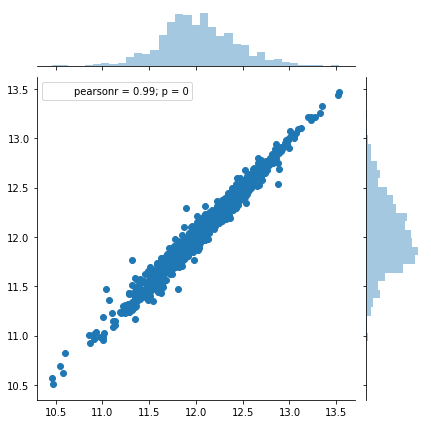

In [293]:
sns.jointplot(y_train, grid.predict(train.values))

In [295]:
np.expm1(grid.predict(test.values))

array([ 122212.6171875,  160938.65625  ,  187456.03125  , ...,
        163071.046875 ,  116025.6640625,  230108.953125 ], dtype=float32)

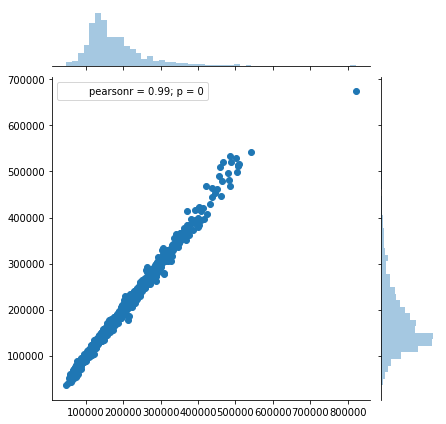

In [297]:
#difference between the previous ensemble and the current one
sns.jointplot(output['SalePrice'].values, np.expm1(grid.predict(test.values)))
#this one large outlier would contribute a lot to error - ALOT
#trick is how to get a good estimate for this one valeu 

In [298]:
output2 = pd.DataFrame()
output2['Id'] = test_id[1].values
output2['SalePrice'] = np.expm1(grid.predict(test.values))
output2.head()

,Id,SalePrice
0,1461,122212.617188
1,1462,160938.656250
2,1463,187456.031250
3,1464,191796.609375
4,1465,191206.171875


In [299]:
output.head()

,Id,SalePrice
0,1461,121845.957302
1,1462,157289.952648
2,1463,188017.025993
3,1464,196032.331969
4,1465,190549.810391


In [301]:
output2.to_csv("submit2.csv", index=False) #this doesn't work all that better